In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,roc_curve,auc,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv("/content/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True,axis=1)

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Data Visualization

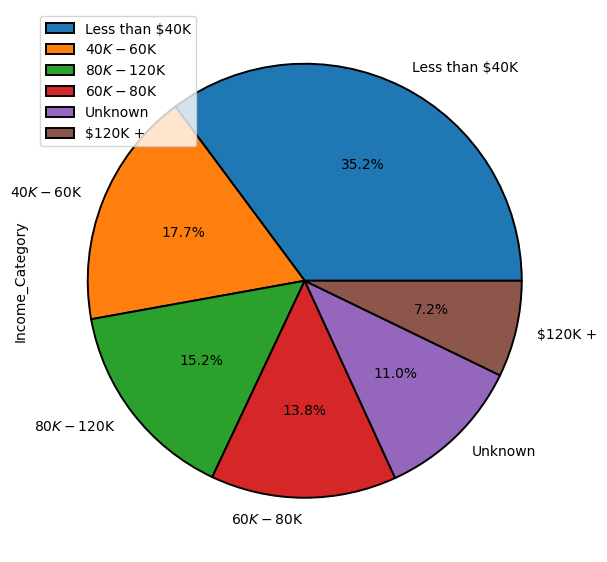

In [ ]:
df.Income_Category.value_counts().plot(kind="pie",figsize=(7,8),wedgeprops = {"edgecolor" : "black",'linewidth':1.4,'antialiased': True},autopct = '%1.1f%%')
plt.legend(loc = 'upper left')
plt.show()

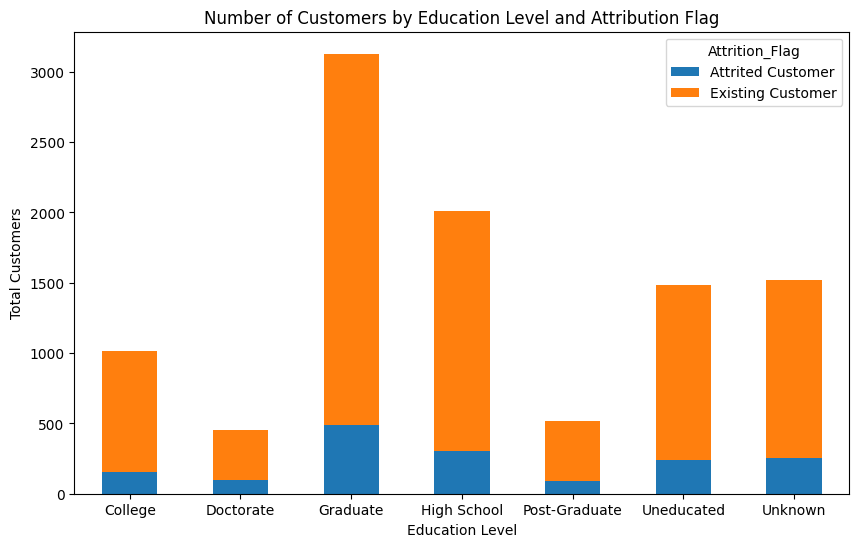

In [ ]:
df.groupby(['Education_Level', 'Attrition_Flag']).size().unstack().plot(kind="bar",rot=0,figsize=(10,6),stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Total Customers')
plt.title('Number of Customers by Education Level and Attribution Flag')
plt.show()

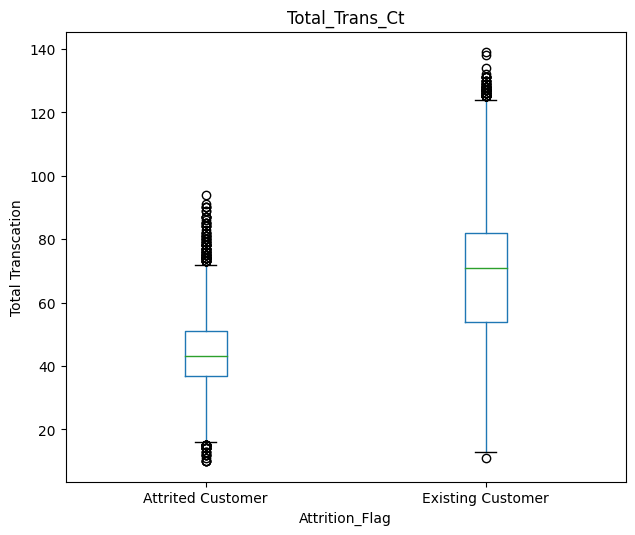

In [ ]:
df.boxplot(column='Total_Trans_Ct', by='Attrition_Flag',figsize=(7,6),grid=False,rot=0)
plt.ylabel("Total Transcation")
plt.suptitle("")
plt.show()

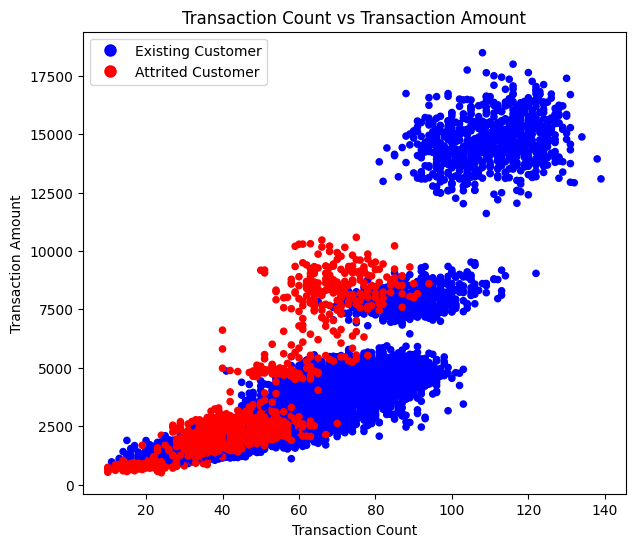

In [ ]:
colors = ['red' if flag == 'Attrited Customer' else 'blue' for flag in df['Attrition_Flag']]
df.plot.scatter('Total_Trans_Ct','Total_Trans_Amt',c=colors,figsize=(7,6))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Existing Customer', markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Attrited Customer', markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements)
plt.title('Transaction Count vs Transaction Amount')
plt.xlabel('Transaction Count')
plt.ylabel('Transaction Amount')
plt.show()

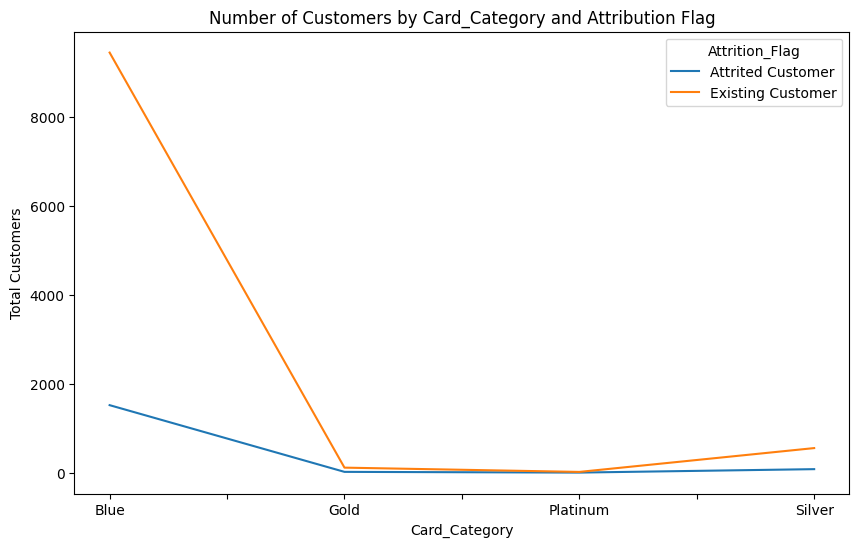

In [ ]:
df.groupby(['Card_Category', 'Attrition_Flag']).size().unstack().plot(rot=0,figsize=(10,6),stacked=True)
plt.xlabel('Card_Category')
plt.ylabel('Total Customers')
plt.title('Number of Customers by Card_Category and Attribution Flag')
plt.show()

<ipython-input-138-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

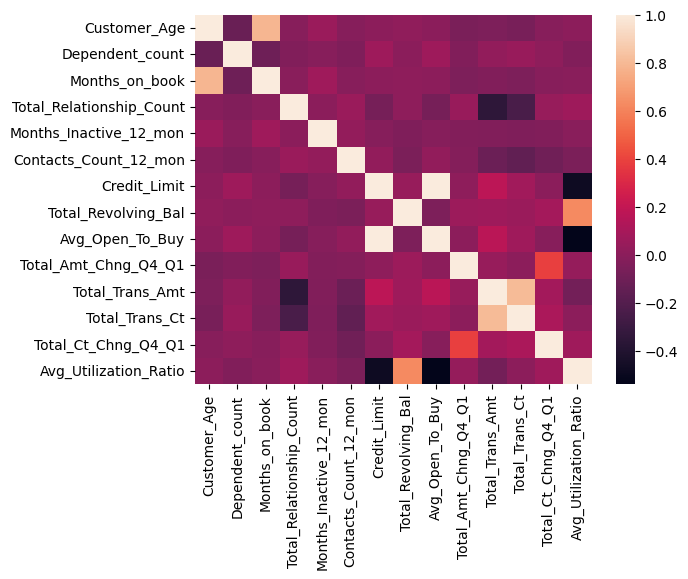

In [ ]:
sns.heatmap(df.corr())

## Data Preprocessing for Machine Learning  

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
le=LabelEncoder()
df.Attrition_Flag=le.fit_transform(df.Attrition_Flag)
df.Education_Level=le.fit_transform(df.Education_Level)
df.Income_Category=le.fit_transform(df.Income_Category)

In [ ]:
mapCard = {"Blue":0, "Silver":1, "Gold":2, "Platinum":3}
df["Card_Category"] = df["Card_Category"].map(mapCard)

In [ ]:
gender=pd.get_dummies(df.Gender,prefix='Gender')
marital_status=pd.get_dummies(df.Marital_Status,prefix='Martial_status')

In [ ]:
df=pd.concat([df, gender,marital_status], axis=1)
df.drop(['Gender','Marital_Status'],axis=1,inplace=True)

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Martial_status_Divorced,Martial_status_Married,Martial_status_Single,Martial_status_Unknown
0,1,45,3,3,2,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,1,49,5,2,4,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,1,51,3,2,3,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,1,40,4,3,4,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,1,40,3,5,2,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [ ]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.75,random_state=10)

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
smt = SMOTE(sampling_strategy=0.8)
X_train_sc_sm, y_train_sm = smt.fit_resample(X_train_sc, y_train)

In [ ]:
df1=pd.DataFrame(y_train)
df2=pd.DataFrame(y_train_sm)

In [ ]:
df1.value_counts()

1    2118
0     413
dtype: int64

In [ ]:
df2.value_counts()

1    2118
0    1694
dtype: int64

## Machine Learning Algorithm 

##KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}


grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

grid_search.fit(X_train_sc_sm,y_train_sm)

print(grid_search.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
model1=KNeighborsClassifier(n_neighbors=3,weights='distance')
model1.fit(X_train_sc_sm,y_train_sm) #trained model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
pred_train_model=model1.predict(X_train_sc_sm)
pred_test_model=model1.predict(X_test_sc)

Accuracy Score:  0.7950236966824644
F-1 Score:  0.8699574041593584

---------------------------Roc Curve--------------------------------



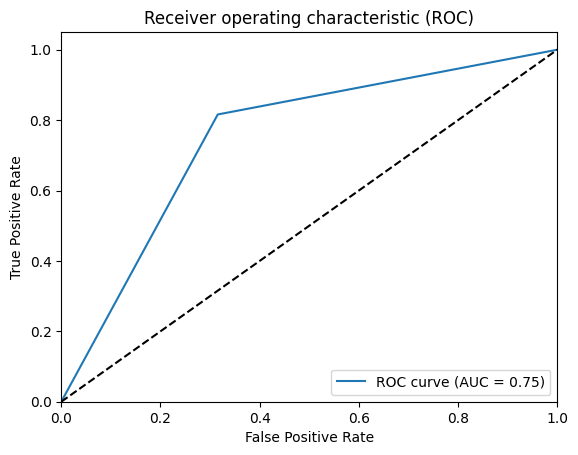

In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,pred_test_model))
print("F-1 Score: ",f1_score(y_test, pred_test_model))
print("\n---------------------------Roc Curve--------------------------------\n")
fpr, tpr, thresholds = roc_curve(y_test, pred_test_model)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##Logistics Regression 

In [ ]:
logr=LogisticRegression(max_iter=1000) #untrained model

In [ ]:
param_grid = {'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(logr, param_grid=param_grid, cv=5)

grid_search.fit(X_train_sc_sm,y_train_sm)

print(grid_search.best_params_)

{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
model2=LogisticRegression(C=5,penalty='l2',solver='liblinear')
model2.fit(X_train_sc_sm,y_train_sm)

LogisticRegression(C=5, solver='liblinear')

In [ ]:
pred_train_model=model2.predict(X_train_sc_sm)
pred_test_model=model2.predict(X_test_sc)

Accuracy Score:  0.866640337019484
F-1 Score:  0.9171370143149284

---------------------------Roc Curve--------------------------------



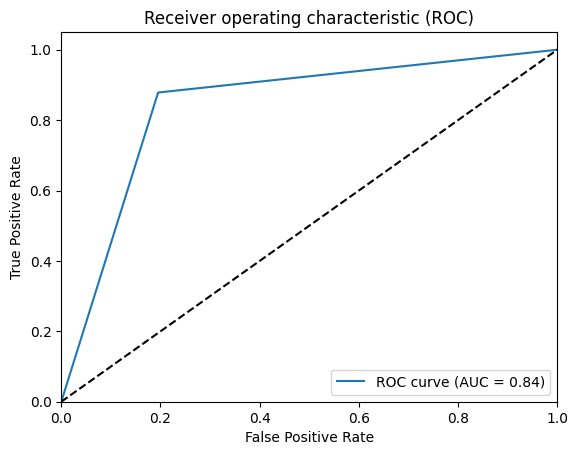

In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,pred_test_model))
print("F-1 Score: ",f1_score(y_test, pred_test_model))
print("\n---------------------------Roc Curve--------------------------------\n")
fpr, tpr, thresholds = roc_curve(y_test, pred_test_model)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Decision Tree 

In [ ]:
dt=DecisionTreeClassifier() #untrained model

In [ ]:
param_grid = {'max_depth': [3, 5, 7, 9,], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10]}


grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)

grid_search.fit(X_train_sc_sm,y_train_sm)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}


In [ ]:
model3=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=5)
model3.fit(X_train_sc_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=5)

In [ ]:
pred_train_model=model3.predict(X_train_sc_sm)
pred_test_model=model3.predict(X_test_sc)

Accuracy Score:  0.9254870984728805
F-1 Score:  0.9553768527278461

---------------------------Roc Curve--------------------------------



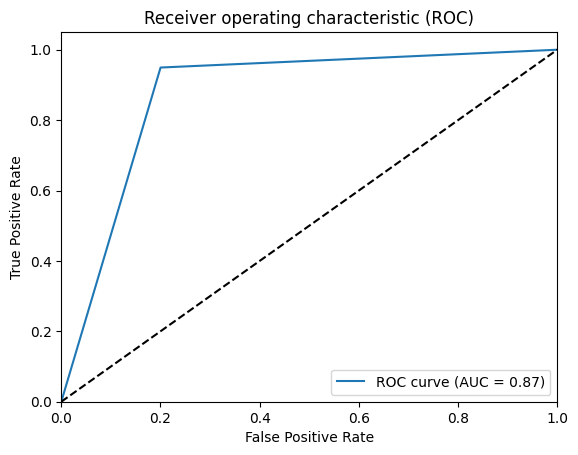

In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,pred_test_model))
print("F-1 Score: ",f1_score(y_test, pred_test_model))
print("\n---------------------------Roc Curve--------------------------------\n")
fpr, tpr, thresholds = roc_curve(y_test, pred_test_model)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [ ]:
nb = GaussianNB() #untrained model

In [ ]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5)

grid_search.fit(X_train_sc_sm,y_train_sm)

print(grid_search.best_params_)

{'var_smoothing': 1e-05}


In [ ]:
model4=GaussianNB(var_smoothing=1e-9)
model4.fit(X_train_sc_sm,y_train_sm)

GaussianNB()

In [ ]:
pred_train_model=model4.predict(X_train_sc_sm)
pred_test_model=model4.predict(X_test_sc)

Accuracy Score:  0.8131911532385466
F-1 Score:  0.8813644344118384

---------------------------Roc Curve--------------------------------



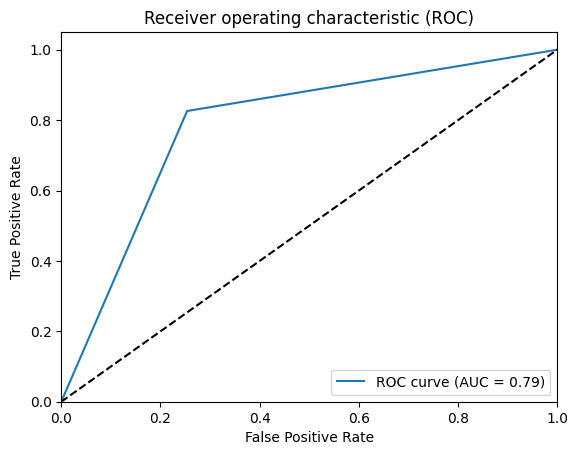

In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,pred_test_model))
print("F-1 Score: ",f1_score(y_test, pred_test_model))
print("\n---------------------------Roc Curve--------------------------------\n")
fpr, tpr, thresholds = roc_curve(y_test, pred_test_model)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()